<a href="https://colab.research.google.com/github/SeaLeeDawng1one/CT-Phoi/blob/main/TNCT_PHOI_CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/gdrive
Before transpose: (613, 3, 224, 224)
After transpose:  (613, 224, 224, 3)
y_train unique labels: [0 1 2 3]


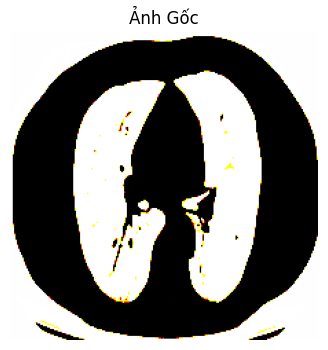

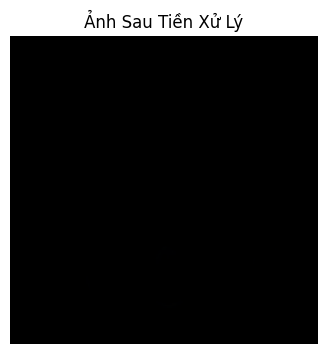

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 70, 70, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 23, 23, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,386,372 (16.73 MB)

 Trainable params: 4,386,372 (16.73 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 295ms/step - accuracy: 0.3718 - loss: 1.3765 - val_accuracy: 0.3871 - val_loss: 1.3380
Epoch 2/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4871 - loss: 1.2868 - val_accuracy: 0.3871 - val_loss: 1.2593
Epoch 3/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4815 - loss: 1.1484 - val_accuracy: 0.3871 - val_loss: 1.2777
Epoch 4/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5444 - loss: 1.0673 - val_accuracy: 0.4355 - val_loss: 1.2547
Epoch 5/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5706 - loss: 1.0504 - val_accuracy: 0.5000 - val_loss: 1.2031
Epoch 6/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5197 - loss: 1.0162 - val_accuracy: 0.4355 - val_loss: 1.1366
Epoch 7/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5416 - loss: 0.9863 - val_accuracy: 0.4839 - val_loss: 1.1008
Epoch 8/60
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5640 - loss: 0.9753 - val_accuracy: 0.5000 -

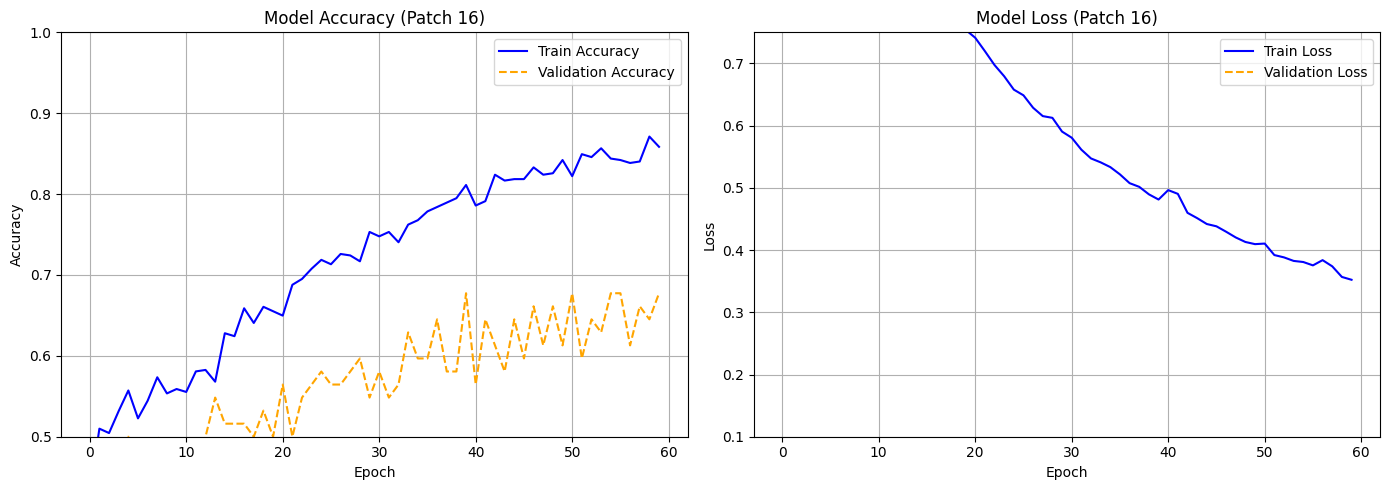

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 297ms/step - accuracy: 0.5425 - loss: 1.4421
Test loss: 1.3199
Test accuracy: 0.5694
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step


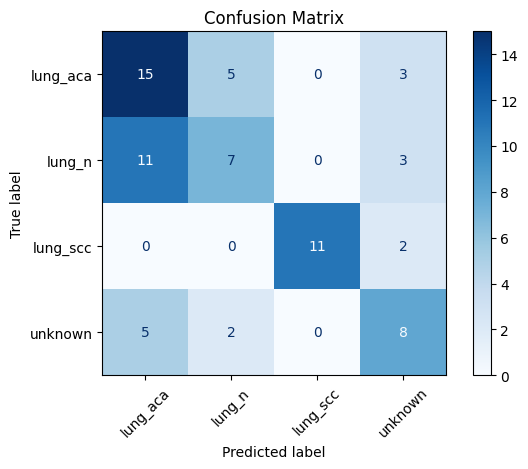

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from google.colab import drive
import os

# 1. Mount Google Drive và load dữ liệu
drive.mount('/content/gdrive', force_remount=True)
data_dir = "/content/gdrive/My Drive/saved_data"

X_train = np.load(os.path.join(data_dir, "train_images.npy"))
y_train = np.load(os.path.join(data_dir, "train_labels.npy"))
X_test  = np.load(os.path.join(data_dir, "valid_images.npy"))
y_test  = np.load(os.path.join(data_dir, "valid_labels.npy"))

# 2. Kiểm tra shape và chuyển định dạng nếu cần
print("Before transpose:", X_train.shape)
if X_train.ndim == 4 and X_train.shape[1] == 3:
    X_train = X_train.transpose(0, 2, 3, 1)
    X_test  = X_test.transpose(0, 2, 3, 1)
print("After transpose: ", X_train.shape)
print("y_train unique labels:", np.unique(y_train))

# 3. Hiển thị ảnh gốc mẫu
plt.figure(figsize=(4, 4))
plt.imshow(X_train[0].astype(np.uint8))
plt.title("Ảnh Gốc")
plt.axis("off")
plt.show()

# 4. Tiền xử lý ảnh
def preprocess_image(img):
    img_resized = cv2.resize(img, (224, 224))
    img_blurred = cv2.GaussianBlur(img_resized, (5, 5), 0)
    hsv = cv2.cvtColor(img_blurred, cv2.COLOR_RGB2HSV)
    hsv[:, :, 2] = np.clip(hsv[:, :, 2] * 1.2, 0, 255)
    img_bright = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    return img_bright

# 5. Áp dụng tiền xử lý
X_train = np.array([preprocess_image(img) for img in X_train])
X_test = np.array([preprocess_image(img) for img in X_test])

# 6. Hiển thị ảnh sau tiền xử lý
plt.figure(figsize=(4, 4))
plt.imshow(X_train[0].astype(np.uint8))
plt.title("Ảnh Sau Tiền Xử Lý")
plt.axis("off")
plt.show()

# 7. Shuffle và chuẩn hóa
X_train, y_train = shuffle(X_train, y_train, random_state=1080)
X_test,  y_test  = shuffle(X_test,  y_test,  random_state=1080)

X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

# 8. Xây dựng mô hình CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D((3,3)),
    Conv2D(64, (5,5), activation='relu'),
    AveragePooling2D((3,3)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

# 9. Huấn luyện mô hình
history = model.fit(
    X_train, y_train,
    epochs=60,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# 10. Vẽ biểu đồ Accuracy và Loss (song song)
plt.figure(figsize=(14, 5))

# Accuracy chart
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='--')
plt.title('Model Accuracy (Patch 16)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)
plt.grid(True)
plt.legend()

# Loss chart
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--')
plt.title('Model Loss (Patch 16)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0.1, 0.75)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# 11. Đánh giá mô hình
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

# 12. Confusion matrix
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

classes = np.unique(y_test)
label_names = ['lung_aca', 'lung_n', 'lung_scc', 'unknown']  # Tùy chỉnh nhãn theo dữ liệu thực tế

cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
